# Two qubit two level system, entangeling two qubits

In [73]:
#all required imports

%matplotlib inline
import matplotlib.pyplot as plt
import time
import numpy as np
from numpy import pi
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit
import warnings
warnings.filterwarnings("ignore")
from qutip import *
from qutip.control import *
from qutip.control.grape import plot_grape_control_fields, _overlap
from qutip.control.cy_grape import cy_overlap
from qutip.control.grape import cy_grape_unitary, grape_unitary_adaptive
from scipy.interpolate import interp1d
from qutip.ui.progressbar import TextProgressBar
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_bloch_multivector

In [3]:
#creating time steps for GRAPE

T = 1
times = np.linspace(0, T, 100)

In [4]:
#writing out starting state for single qubit

psi0 = basis(2, 0)
print (psi0)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]


In [71]:
#Creating initial state for both qubits and creating transform matrix

qubit1state=basis(2, 0)
qubit2state=basis(2, 0)
entangledstate=tensor(basis(2, 0), basis(2, 0)) #initial state
finalstate=bell_state(state='00') #final state (bell state)

U=finalstate * entangledstate.dag() #input tranformation
U.dims = [[4],[4]] #the dimensions are silly and 
#we had to change them to 4X4 so we can do matrix multiplication
U #printing U to see what it looks like

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.70710678 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.70710678 0.         0.         0.        ]]

In [72]:
#confirming we have the correct final output state from our U

entangledstate.dims = [[4],[1]]
U*entangledstate

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]]

In [8]:
#Define itterations and GRAPE qubit target ????????

#itterations
R = 1000

#GRAPE qubit ????????????
H_ops1=tensor(sigmax(), identity(2))
H_ops2=tensor(identity(2),sigmax())
H_ops3=tensor(sigmay(), identity(2))
H_ops4=tensor(identity(2),sigmay())
H_ops5=tensor(sigmaz(), identity(2))
H_ops6=tensor(identity(2),sigmaz())
H_ops7=tensor(sigmax(), sigmax())
H_ops8=tensor(sigmay(), sigmay())
H_ops9=tensor(sigmaz(), sigmaz())

#making sure dimensions are correct bs dimensions in QuTIP are silly
H_ops1.dims = [[4],[4]]
H_ops2.dims = [[4],[4]]
H_ops3.dims = [[4],[4]]
H_ops4.dims = [[4],[4]]
H_ops5.dims = [[4],[4]]
H_ops6.dims = [[4],[4]]
H_ops7.dims = [[4],[4]]
H_ops8.dims = [[4],[4]]
H_ops9.dims = [[4],[4]]


#writing out list of H_ops
H_ops = [#tensor(sigmax(), identity(2)),
         #tensor(sigmay(), identity(2)),
         #tensor(sigmaz(), identity(2)),
         #tensor(identity(2), sigmax()),
         #tensor(identity(2), sigmay()),
         #tensor(identity(2), sigmaz()),
         H_ops1,H_ops2,H_ops3,H_ops4,H_ops5,H_ops6,H_ops7,H_ops7,H_ops9]

#Labels for the graph
H_labels = [r'$u_{x1}$',
            r'$u_{x2}$',
            r'$u_{y1}$',
            r'$u_{y2}$',
            r'$u_{z1}$',
            r'$u_{z2}$',
            r'$u_{xx}$',
            r'$u_{yy}$',
            r'$u_{zz}$',
        ]


#writing the qubits hamiltonians individually 
Hqubit1 = pi * tensor(sigmaz(), identity(2))
Hqubit2 = pi * tensor(identity(2), sigmaz())

#total hailtonian 
H0 = Hqubit1 + Hqubit2
H0.dims = [[4],[4]]
H0 #printing total hamiltonian 

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 6.28318531  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.         -6.28318531]]

In [11]:
#definiting U0 ?????

u0 = np.array([np.random.rand(len(times)) * 2 * pi * 0.005 for _ in range(len(H_ops))])
u0 = [np.convolve(np.ones(10)/10, u0[idx,:], mode='same') for idx in range(len(H_ops))]

In [12]:
#doing GRAPE!
result = cy_grape_unitary(U, H0, H_ops, R, times, u_start=u0, eps=2*pi/T, phase_sensitive=False,
                          progress_bar=TextProgressBar())

10.0%. Run time:  43.97s. Est. time left: 00:00:06:35
20.0%. Run time:  87.11s. Est. time left: 00:00:05:48
30.0%. Run time: 128.75s. Est. time left: 00:00:05:00
40.0%. Run time: 170.36s. Est. time left: 00:00:04:15
50.0%. Run time: 212.64s. Est. time left: 00:00:03:32
60.0%. Run time: 254.92s. Est. time left: 00:00:02:49
70.0%. Run time: 299.20s. Est. time left: 00:00:02:08
80.0%. Run time: 342.70s. Est. time left: 00:00:01:25
90.0%. Run time: 385.38s. Est. time left: 00:00:00:42
Total run time: 428.10s


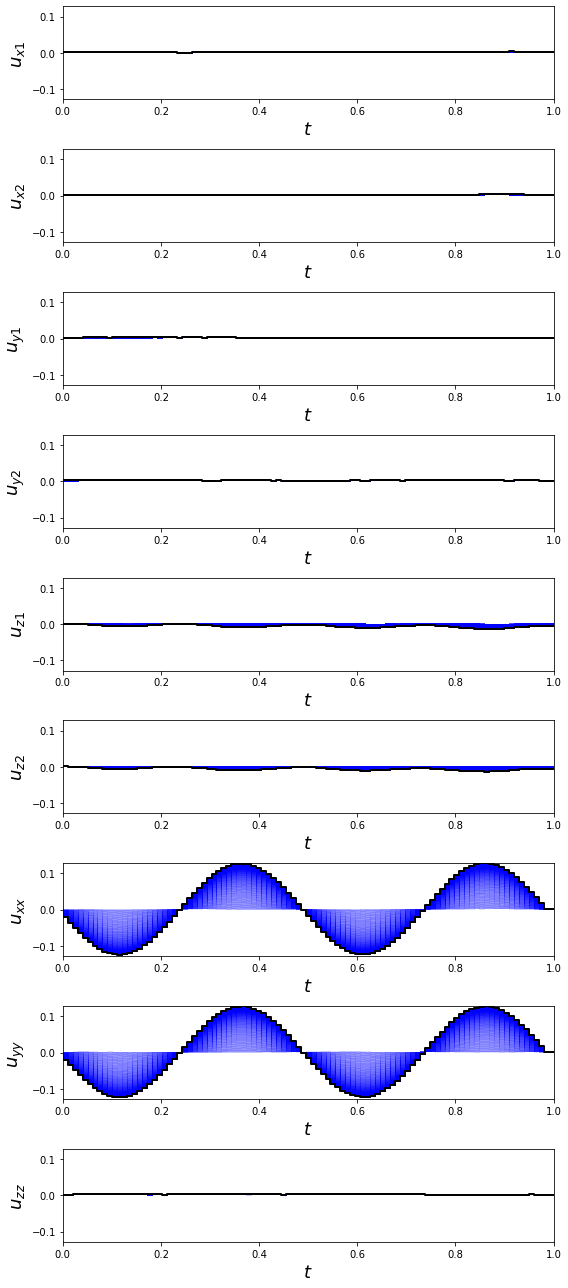

In [58]:
#Plotting pulse sqeuences from GRAPE
plot_grape_control_fields(times, result.u[:,:,:] / (2 * pi), H_labels, uniform_axes=True);
plt.savefig("2qubitpluse.pdf")


In [15]:
#Printing result U, called U_GRAPE in our report
result.U_f.tidyup(1e-2)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.7073387 +0.j          0.        +0.j          0.        +0.j
  -0.70665852+0.01515679j]
 [ 0.        +0.j          0.99944076+0.01549024j  0.        -0.02904704j
   0.        +0.j        ]
 [ 0.        +0.j          0.        -0.02904771j  0.99944604+0.01500844j
   0.        +0.j        ]
 [ 0.70681576+0.j          0.        +0.j          0.        +0.j
   0.70718039-0.01508049j]]

In [25]:
#Printing the ideal final state to compare
idealfinalstate=U*entangledstate
print (idealfinalstate)

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]]


In [74]:
#Printing GRAPE final state (called real in report)
result.U_f.dims = [[4],[4]]
finalstate = result.U_f*entangledstate
print (finalstate)

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.7073387 ]
 [0.        ]
 [0.        ]
 [0.70681576]]


In [27]:
idealdensitymatrix=(idealfinalstate * idealfinalstate.dag())#ideal density matrix
densitymatrix=(finalstate * finalstate.dag())# real density matrix
print (idealdensitymatrix)
print (densitymatrix)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]
Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.50032804 0.         0.         0.49995814]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.49995814 0.         0.         0.49958852]]


In [76]:
#printing fidelity
fidelity(idealdensitymatrix,densitymatrix)

0.9999582125950388

[[0.50032804+0.j 0.        +0.j 0.        +0.j 0.49995814+0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]
 [0.49995814+0.j 0.        +0.j 0.        +0.j 0.49958852+0.j]]


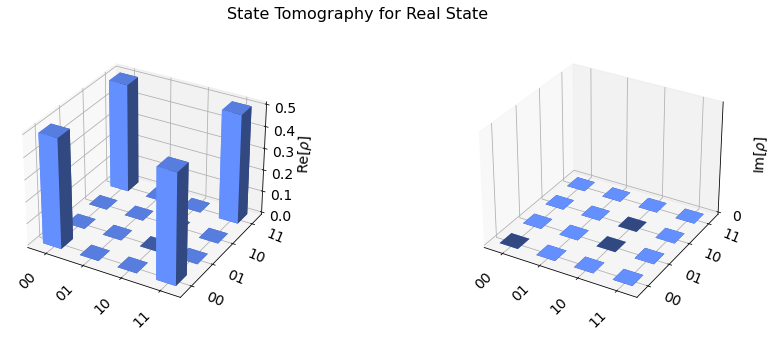

In [61]:
#plotting cityscape for real density matrix
dm=np.array(densitymatrix)
print (dm)
plot_state_city(dm, title='State Tomography for Real State')

[[0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]]


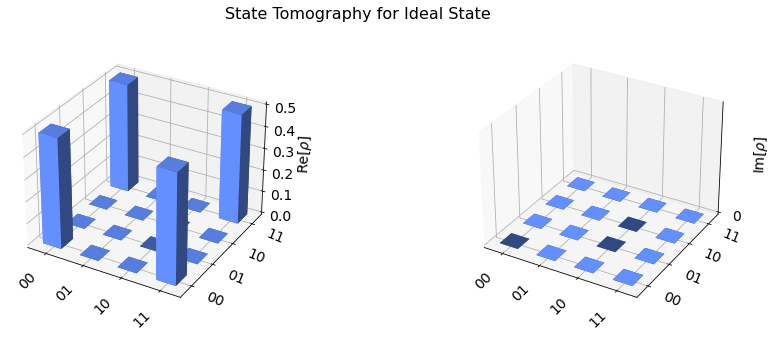

In [62]:
#plotting cityscape for ideal density matrix
idm=np.array(idealdensitymatrix)
print (idm)
plot_state_city(idm, title='State Tomography for Ideal State')